# Phase 4: Random Forest Model Development

In this notebook, we implement the Random Forest classifier. We expect this to outperform the Logistic Regression baseline by capturing non-linear relationships (e.g., the interaction between 'Tenure' and 'MonthlyCharges').

### 1. Setup & Data Loading

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Add src to path
sys.path.append(os.path.abspath('..'))
from src.config import PROCESSED_DATA_DIR
from src.model_training import train_random_forest, evaluate_model_cv, evaluate_model_test, plot_model_performance, get_feature_importance

# Load processed data
X_train = pd.read_csv(PROCESSED_DATA_DIR / 'X_train.csv')
X_test = pd.read_csv(PROCESSED_DATA_DIR / 'X_test.csv')
y_train = pd.read_csv(PROCESSED_DATA_DIR / 'y_train.csv').values.ravel()
y_test = pd.read_csv(PROCESSED_DATA_DIR / 'y_test.csv').values.ravel()

### 2. Train Random Forest
We use the hyperparameters discussed (Depth=15, Min_Leaf=4) to ensure a balanced model.

In [3]:
# Train Model
rf_model = train_random_forest(X_train, y_train, class_weight='balanced')

print("Random Forest Model Trained.")

Random Forest Model Trained.


### 3. Evaluation (CV & Test)
We compare these results to our Baseline.

Cross-Validation Results:


,RF Mean Score
fit_time,0.669154
score_time,0.118769
test_accuracy,0.781694
test_precision,0.569051
test_recall,0.719192
test_f1,0.635124
test_roc_auc,0.845586



Test Set Performance:


,RF Test Score
accuracy,0.775089
precision,0.560086
recall,0.701613
f1,0.622912
roc_auc,0.837319


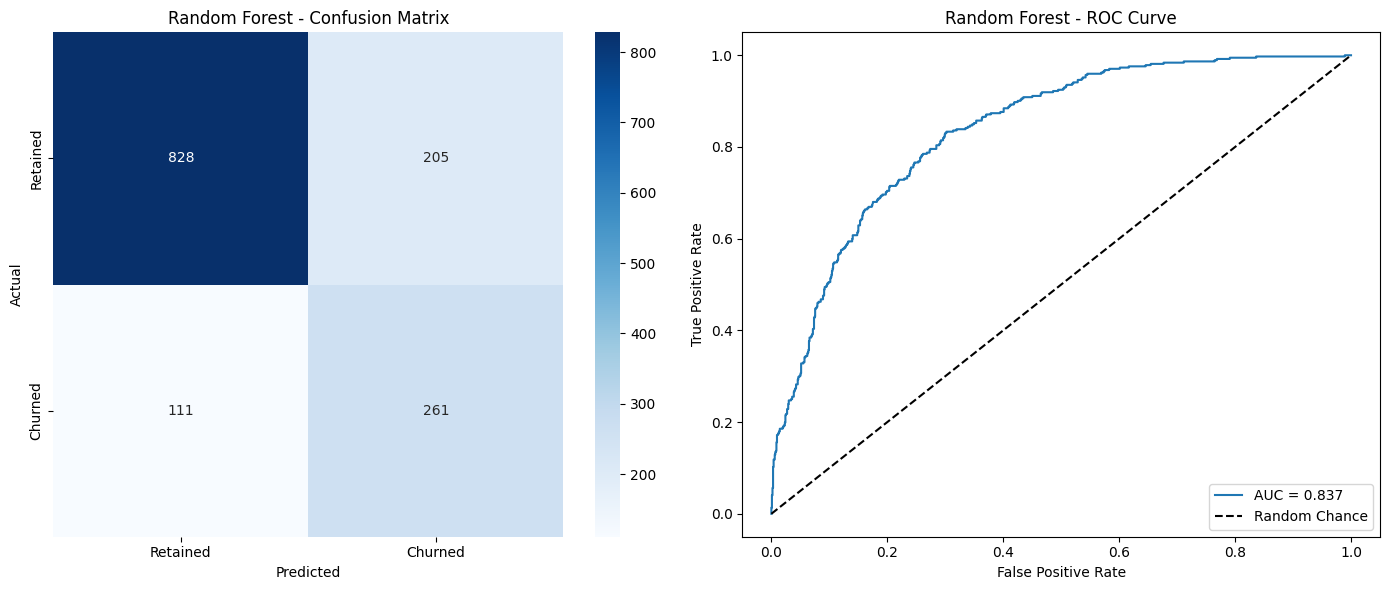

In [4]:
# 1. Cross-Validation (Stability Check)
cv_results = evaluate_model_cv(rf_model, X_train, y_train)
print("Cross-Validation Results:")
display(pd.DataFrame(cv_results, index=['RF Mean Score']).T)

# 2. Test Set Evaluation
test_metrics, y_pred, y_prob = evaluate_model_test(rf_model, X_test, y_test)
print("\nTest Set Performance:")
display(pd.DataFrame(test_metrics, index=['RF Test Score']).T)

# 3. Visualizations
plot_model_performance(y_test, y_pred, y_prob, model_name="Random Forest")

### 4. Feature Importance Analysis
This is the "Why" behind the predictions. Random Forest calculates importance by how much each feature decreases impurity (Gini) across all trees.

C:\Users\ishfa\AppData\Local\Temp\ipykernel_9884\3693239201.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=imp_df.head(15), palette='viridis')


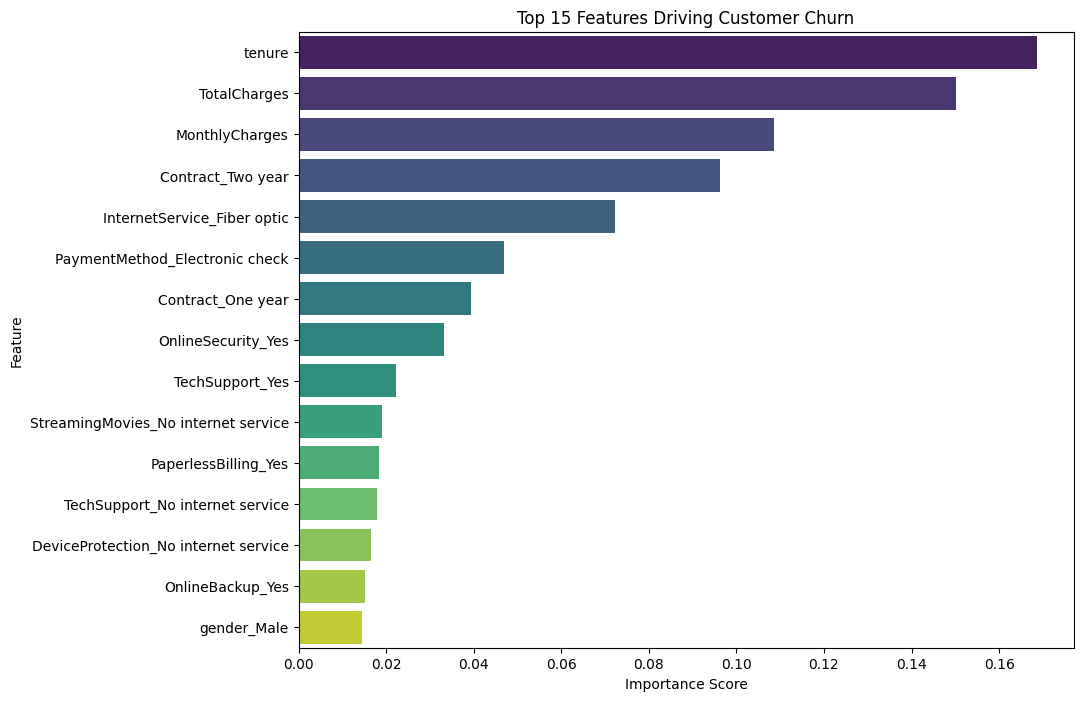

Key Insight: Notice how 'Tenure', 'TotalCharges', and 'Contract_Month-to-month' usually dominate.


In [5]:
# Extract Importances
imp_df = get_feature_importance(rf_model, X_train.columns)

# Plot Top 15 Features
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=imp_df.head(15), palette='viridis')
plt.title('Top 15 Features Driving Customer Churn')
plt.xlabel('Importance Score')
plt.show()

print("Key Insight: Notice how 'Tenure', 'TotalCharges', and 'Contract_Month-to-month' usually dominate.")

### 5. Decision Visualization (One Tree)
Random Forests are "Black Boxes," but we can peek inside by visualizing a single tree from the forest. This helps explain the logic to stakeholders.

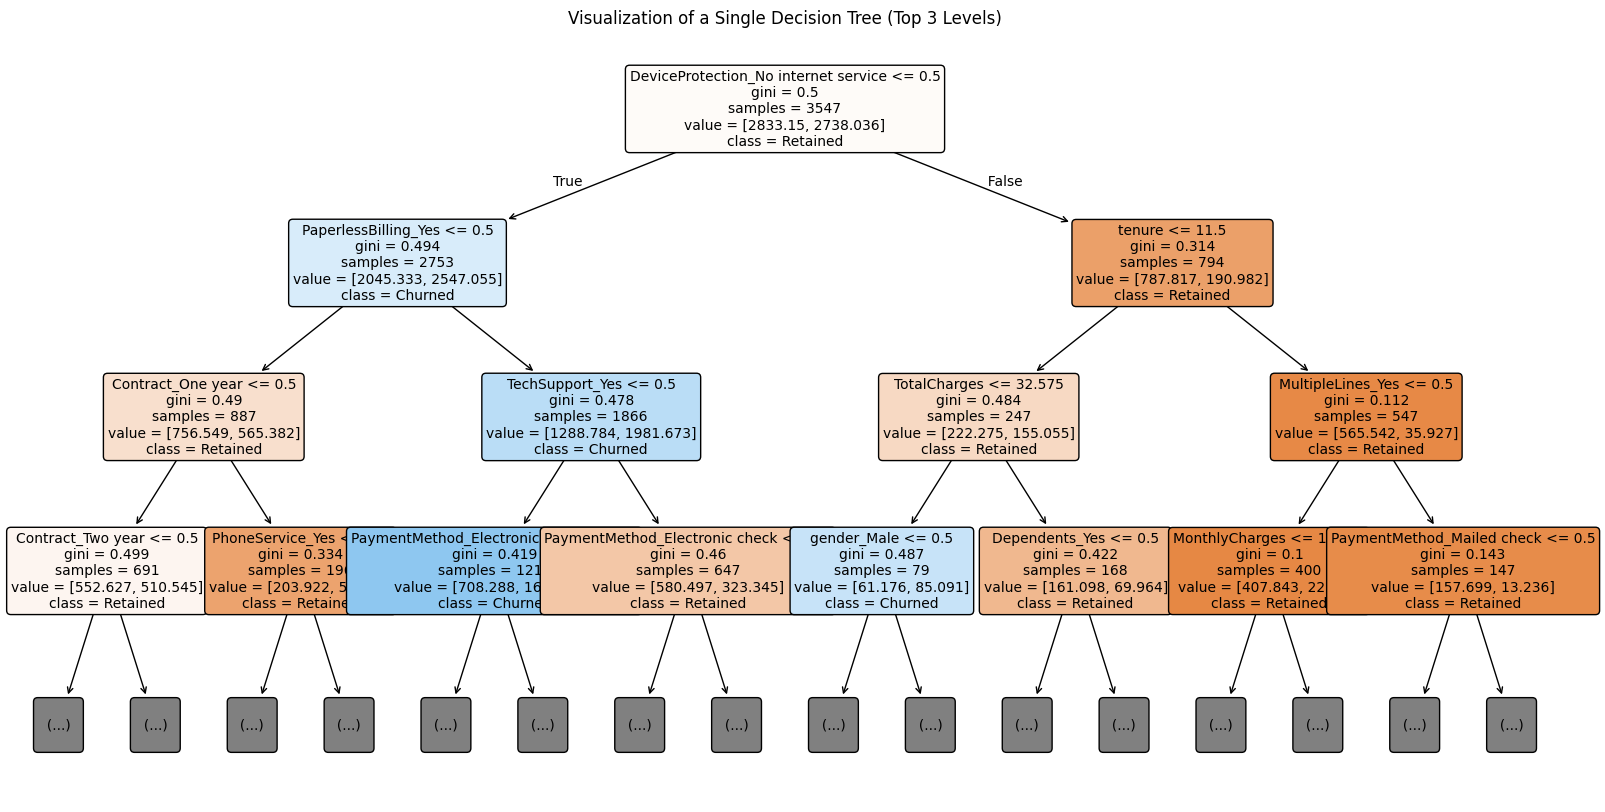

In [6]:
from sklearn.tree import plot_tree

# Pick one tree from the forest (e.g., the first one)
single_tree = rf_model.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(single_tree, 
          feature_names=X_train.columns,
          class_names=['Retained', 'Churned'],
          filled=True, 
          rounded=True, 
          max_depth=3,  # Only show top 3 levels for readability
          fontsize=10)
plt.title('Visualization of a Single Decision Tree (Top 3 Levels)')
plt.show()